In [208]:
# Step 1: Import packages, functions, and classes
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

In [216]:
# Step 2: Data Processing
return_data = pd.read_csv('COMP0050_CourseworkData\Average_Equal_Weighted_Returns.csv', index_col = 0)
return_data = return_data.replace(' NaN', np.nan).dropna()
a = return_data.shape
for i in range(a[0]):
    for j in range(a[1]):
        if type(return_data.iloc[i,j]) != np.float64:
            return_data.iloc[i,j] = np.float64(return_data.iloc[i,j])
data = return_data.T


C:\Users\Lsj_Mark10\AppData\Local\Temp\ipykernel_76772\2373045844.py:2: DtypeWarning: Columns (3,11,15,20,26,27,33,38) have mixed types. Specify dtype option on import or set low_memory=False.
  return_data = pd.read_csv('COMP0050_CourseworkData\Average_Equal_Weighted_Returns.csv', index_col = 0)


#### K-Means Clustering

c:\Program_Files_Work\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


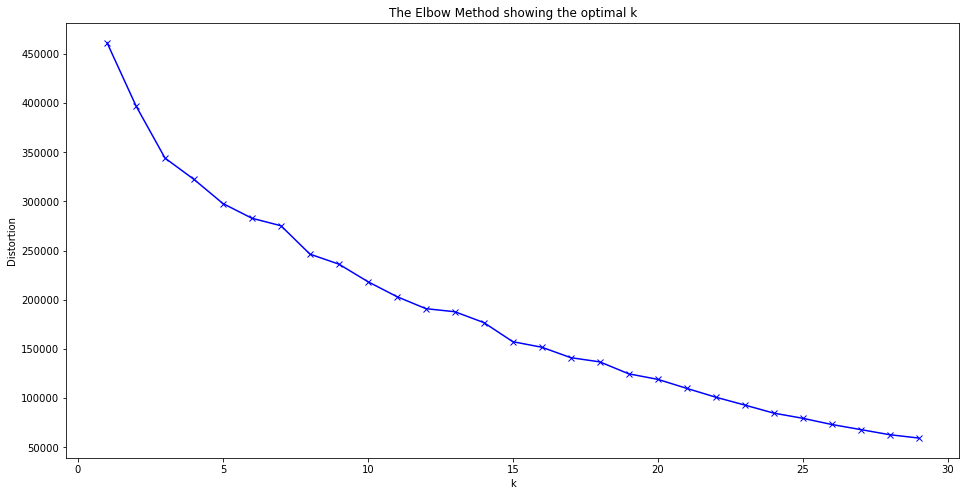

In [217]:
# Step 3: Create a model
#from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Step 4: Evaluate the model
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()




#features, true_labels = make_blobs(n_samples = 200, centers = 3, cluster_std = 2.75, random_state = 42)
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)
#scaled_features[:5]




In [230]:
#Initialize the class object
cluster_numbers = 5
kmeans = KMeans(n_clusters = cluster_numbers)
#predict the labels of clusters.
label = kmeans.fit_predict(data)
print(label)
#Getting unique labels
u_labels = np.unique(label)
for i in range(cluster_numbers):
    print('Cluster', i, 'has industries:', data.index[label == i].values, '\n')

[1 1 1 1 0 3 3 1 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 4 1 1 3 1 3 3 3 3
 1 1 1 1 1 1 1 1 1 1 3]
Cluster 0 has industries: ['Smoke'] 

Cluster 1 has industries: ['Agric' 'Food ' 'Soda ' 'Beer ' 'Books' 'Hshld' 'Clths' 'Chems' 'Rubbr'
 'Txtls' 'BldMt' 'Cnstr' 'Steel' 'FabPr' 'Mach ' 'Autos' 'Aero ' 'Ships'
 'Guns ' 'Mines' 'Oil  ' 'Util ' 'PerSv' 'Paper' 'Boxes' 'Trans' 'Whlsl'
 'Rtail' 'Meals' 'Banks' 'Insur' 'RlEst' 'Fin  '] 

Cluster 2 has industries: ['Gold '] 

Cluster 3 has industries: ['Toys ' 'Fun  ' 'Hlth ' 'MedEq' 'Drugs' 'ElcEq' 'Telcm' 'BusSv' 'Comps'
 'Chips' 'LabEq' 'Other'] 

Cluster 4 has industries: ['Coal '] 



In [219]:
avg_return = pd.Series(np.sum(return_data), index = return_data.columns)
print(avg_return.sort_values())



Util      676.25
Coal      730.76
Txtls     742.59
Steel     743.06
Paper     779.99
Autos     808.32
Ships     810.41
Agric      819.6
Hshld     834.74
Rtail     838.07
Books     839.25
FabPr     840.32
Trans     843.54
Toys      864.51
Boxes     872.05
Clths     884.47
Food      890.97
Meals     898.58
PerSv     899.53
Other     903.65
Whlsl     908.75
RlEst     912.17
Beer      913.07
Chems     916.02
Telcm     925.79
Cnstr     927.43
Insur     930.69
Soda      950.69
BldMt      951.2
Banks     953.08
Mach      953.24
Fin       956.53
Oil       979.21
Comps     982.34
Fun      1030.29
Mines    1046.73
MedEq     1050.0
ElcEq    1054.59
Rubbr    1062.02
BusSv    1071.51
Aero     1073.55
Smoke    1096.87
Hlth     1108.53
Guns     1110.35
Chips    1146.04
Drugs    1147.63
Gold     1267.17
LabEq    1281.88
dtype: object


####  Expectation-Maximisation Algorithm

In [ ]:
from scipy import stats, special
def get_random_psd(n):
    x = np.random.normal(0, 1, size=(n, n))
    return np.dot(x, x.transpose())


def initialize_random_params():
    params = {'phi': np.random.uniform(0, 1),
              'mu0': np.random.normal(0, 1, size=(2,)),
              'mu1': np.random.normal(0, 1, size=(2,)),
              'sigma0': get_random_psd(2),
              'sigma1': get_random_psd(2)}
    return params

def e_step(x, params):
    np.log([stats.multivariate_normal(params["mu0"], params["sigma0"]).pdf(x),
            #stats.multivariate_normal(params["mu1"], params["sigma1"]).pdf(x)])
    log_p_y_x = np.log([1-params["phi"], params["phi"]])[np.newaxis, ...] + \
                np.log([stats.multivariate_normal(params["mu0"], params["sigma0"]).pdf(x),
            stats.multivariate_normal(params["mu1"], params["sigma1"]).pdf(x)]).T
    log_p_y_x_norm = logsumexp(log_p_y_x, axis=1)
    return log_p_y_x_norm, np.exp(log_p_y_x - log_p_y_x_norm[..., np.newaxis])


def m_step(x, params):
    total_count = x.shape[0]
    _, heuristics = e_step(x, params)
    heuristic0 = heuristics[:, 0]
    heuristic1 = heuristics[:, 1]
    sum_heuristic1 = np.sum(heuristic1)
    sum_heuristic0 = np.sum(heuristic0)
    phi = (sum_heuristic1/total_count)
    mu0 = (heuristic0[..., np.newaxis].T.dot(x)/sum_heuristic0).flatten()
    mu1 = (heuristic1[..., np.newaxis].T.dot(x)/sum_heuristic1).flatten()
    diff0 = x - mu0
    sigma0 = diff0.T.dot(diff0 * heuristic0[..., np.newaxis]) / sum_heuristic0
    diff1 = x - mu1
    sigma1 = diff1.T.dot(diff1 * heuristic1[..., np.newaxis]) / sum_heuristic1
    params = {'phi': phi, 'mu0': mu0, 'mu1': mu1, 'sigma0': sigma0, 'sigma1': sigma1}
    return params


def get_avg_log_likelihood(x, params):
    loglikelihood, _ = e_step(x, params)
    return np.mean(loglikelihood)


def run_em(x, params):
    avg_loglikelihoods = []
    while True:
        avg_loglikelihood = get_avg_log_likelihood(x, params)
        avg_loglikelihoods.append(avg_loglikelihood)
        if len(avg_loglikelihoods) > 2 and abs(avg_loglikelihoods[-1] - avg_loglikelihoods[-2]) < 0.0001:
            break
        params = m_step(x, params)
    print("\tphi: %s\n\tmu_0: %s\n\tmu_1: %s\n\tsigma_0: %s\n\tsigma_1: %s"
               % (params['phi'], params['mu0'], params['mu1'], params['sigma0'], params['sigma1']))
    _, posterior = e_step(x, params)
    forecasts = np.argmax(posterior, axis=1)
    return forecasts, posterior, avg_loglikelihoods

random_params = initialize_random_params()
unsupervised_forecastsforecasts, unsupervised_posterior, unsupervised_loglikelihoods = run_em(data, random_params)
print("total steps: ", len(unsupervised_loglikelihoods))
plt.plot(unsupervised_loglikelihoods)
plt.title("unsupervised log likelihoods")
plt.savefig("unsupervised.png")
plt.close()

#### Hierarchical Clustering

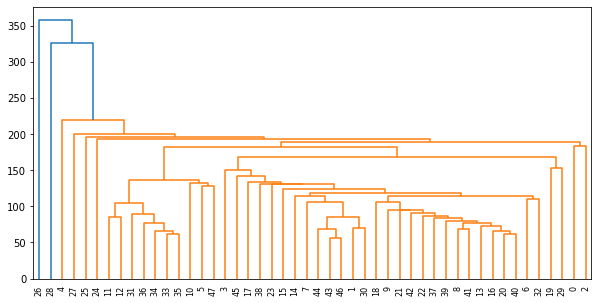

In [235]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [234]:
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

print(label)
#Getting unique labels
u_labels = np.unique(label)
for i in range(cluster_numbers):
    print('Cluster', i, 'has industries:', data.index[label == i].values, '\n')

[1 1 1 1 0 3 3 1 1 1 3 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 2 1 4 1 1 3 1 3 3 3 3
 1 1 1 1 1 1 1 1 1 1 3]
Cluster 0 has industries: ['Smoke'] 

Cluster 1 has industries: ['Agric' 'Food ' 'Soda ' 'Beer ' 'Books' 'Hshld' 'Clths' 'Chems' 'Rubbr'
 'Txtls' 'BldMt' 'Cnstr' 'Steel' 'FabPr' 'Mach ' 'Autos' 'Aero ' 'Ships'
 'Guns ' 'Mines' 'Oil  ' 'Util ' 'PerSv' 'Paper' 'Boxes' 'Trans' 'Whlsl'
 'Rtail' 'Meals' 'Banks' 'Insur' 'RlEst' 'Fin  '] 

Cluster 2 has industries: ['Gold '] 

Cluster 3 has industries: ['Toys ' 'Fun  ' 'Hlth ' 'MedEq' 'Drugs' 'ElcEq' 'Telcm' 'BusSv' 'Comps'
 'Chips' 'LabEq' 'Other'] 

Cluster 4 has industries: ['Coal '] 

